In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('results-survey080319.csv')
#range1 = range(0,6)
df = df.drop(df.columns[[range(0,6)]], axis=1)
df.rename(columns={'1._Please_select_your_country:': 'Country'\
                       ,'2._Please_select_your_business_category?': 'Business Category', \
                       '4._Have_you_ever_run_any_internet_measurement_campaign_-_either_as_a_business_owner_or_a_home_broadband/mobile_device_user?'\
                       : 'Campaign Run'}, inplace=True)
types_of_network = ['Country',
                    'Campaign Run',
                    '5._Please_provide_more_information.',
                    '3._What_type_of_network_are_you_operating?_[FTTX]',
 '3._What_type_of_network_are_you_operating?_[ADSL]',
 '3._What_type_of_network_are_you_operating?_[Mobile_(2G,_3G,_LTE,_LTE-A)]',
 '3._What_type_of_network_are_you_operating?_[Wireless_network_(WIFI,_Wimax)]',
 '3._What_type_of_network_are_you_operating?_[IP_Transit_Services/Wholesale]',
 '3._What_type_of_network_are_you_operating?_[Community_network_(Mesh_network)]',
 '3._What_type_of_network_are_you_operating?_[Local_Area_Network]',
 '3._What_type_of_network_are_you_operating?_[N/A]',
 '3._What_type_of_network_are_you_operating?_[Other]',]
df

/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/base.py:2095: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


,Country,Business Category,2._Please_select_your_business_category?_[Other],3._What_type_of_network_are_you_operating?_[FTTX],3._What_type_of_network_are_you_operating?_[ADSL],"3._What_type_of_network_are_you_operating?_[Mobile_(2G,_3G,_LTE,_LTE-A)]","3._What_type_of_network_are_you_operating?_[Wireless_network_(WIFI,_Wimax)]",3._What_type_of_network_are_you_operating?_[IP_Transit_Services/Wholesale],3._What_type_of_network_are_you_operating?_[Community_network_(Mesh_network)],3._What_type_of_network_are_you_operating?_[Local_Area_Network],...,Question_time:_ques22,Question_time:_ques23,Question_time:_ques24,Question_time:_ques25,Group_time:_Conclusion,Question_time:_ques26,Question_time:_ques27,Question_time:_ques28,Question_time:_ques29,Question_time:_ques30
0,Mauritius,Datacentre,NaN,No,No,No,Yes,No,No,Yes,...,NaN,NaN,NaN,NaN,41.60,NaN,NaN,NaN,NaN,NaN
1,Congo-Kinshasa,End-user (Home/Mobile broadband),NaN,No,No,Yes,Yes,No,No,Yes,...,NaN,NaN,NaN,NaN,143.55,NaN,NaN,NaN,NaN,NaN
2,Sudan,Academic Institution,NaN,No,No,No,Yes,No,Yes,Yes,...,NaN,NaN,NaN,NaN,126.32,NaN,NaN,NaN,NaN,NaN
3,Zimbabwe,Regulator/Government Agency,NaN,No,No,No,No,No,No,Yes,...,NaN,NaN,NaN,NaN,93.74,NaN,NaN,NaN,NaN,NaN
4,Madagascar,Internet eXchange Point (IXP),NaN,No,No,No,Yes,Yes,No,Yes,...,NaN,NaN,NaN,NaN,767.43,NaN,NaN,NaN,NaN,NaN
5,South Africa,Enterprise Network,NaN,Yes,No,No,No,Yes,No,Yes,...,NaN,NaN,NaN,NaN,82.52,NaN,NaN,NaN,NaN,NaN
6,Nigeria,Internet Service Provider (ISP),NaN,No,No,No,No,Yes,No,No,...,NaN,NaN,NaN,NaN,136.47,NaN,NaN,NaN,NaN,NaN
7,Burkina Faso,Telecom (Mobile) Operator,NaN,No,No,Yes,Yes,Yes,No,Yes,...,NaN,NaN,NaN,NaN,149.86,NaN,NaN,NaN,NaN,NaN
8,Togo,End-user (Home/Mobile broadband),NaN,No,Yes,Yes,No,No,No,No,...,NaN,NaN,NaN,NaN,74.61,NaN,NaN,NaN,NaN,NaN
9,Cote d'Ivoire,Civil society,NaN,No,No,No,No,No,No,Yes,...,NaN,NaN,NaN,NaN,437.37,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns.tolist()

['Country',
 'Business Category',
 '2._Please_select_your_business_category?_[Other]',
 '3._What_type_of_network_are_you_operating?_[FTTX]',
 '3._What_type_of_network_are_you_operating?_[ADSL]',
 '3._What_type_of_network_are_you_operating?_[Mobile_(2G,_3G,_LTE,_LTE-A)]',
 '3._What_type_of_network_are_you_operating?_[Wireless_network_(WIFI,_Wimax)]',
 '3._What_type_of_network_are_you_operating?_[IP_Transit_Services/Wholesale]',
 '3._What_type_of_network_are_you_operating?_[Community_network_(Mesh_network)]',
 '3._What_type_of_network_are_you_operating?_[Local_Area_Network]',
 '3._What_type_of_network_are_you_operating?_[N/A]',
 '3._What_type_of_network_are_you_operating?_[Other]',
 'Campaign Run',
 '5._Please_provide_more_information.',
 '6._Please_state_your_main_purpose_for_running_network_measurements?_[Network_monitoring]',
 '6._Please_state_your_main_purpose_for_running_network_measurements?_[Quality_of_Service_(QoS)/Quality_of_Experience_(QoE)]',
 '6._Please_state_your_main_purpos

In [4]:
#Number and Percentage of responses per country
def country_responses():
    col1 = df['Country'].value_counts(dropna=False)
    col2 = df['Country'].value_counts(dropna=False, normalize=True)*100
    final = pd.concat([col1, col2], axis=1)
    final.columns = ['Number of Responses', 'Percentage of Responses']
    return final
country_responses()

,Number of Responses,Percentage of Responses
South Africa,16,17.391304
Nigeria,14,15.217391
Ethiopia,6,6.521739
Uganda,6,6.521739
Morocco,4,4.347826
Sudan,4,4.347826
Cameroon,3,3.260870
Ghana,3,3.260870
Burkina Faso,3,3.260870
Madagascar,3,3.260870


In [5]:
#Number of Responses by Business Category
def business_responses():
    return df['Business Category'].value_counts(dropna=False)
business_responses()

Internet Service Provider (ISP)     16
Academic Institution                16
Academic network (NRENs)            12
End-user (Home/Mobile broadband)    10
Civil society                        7
Regulator/Government Agency          5
Internet eXchange Point (IXP)        5
ccTLD/DNS Operator                   4
Enterprise Network                   4
Other                                3
Telecom (Mobile) Operator            3
Datacentre                           3
Community Network                    3
Wireless network                     1
Name: Business Category, dtype: int64

In [6]:
clear




Type 'Yes' or 1 for list of businesses running measurement campaign and 'No' or 0 otherwise.

1




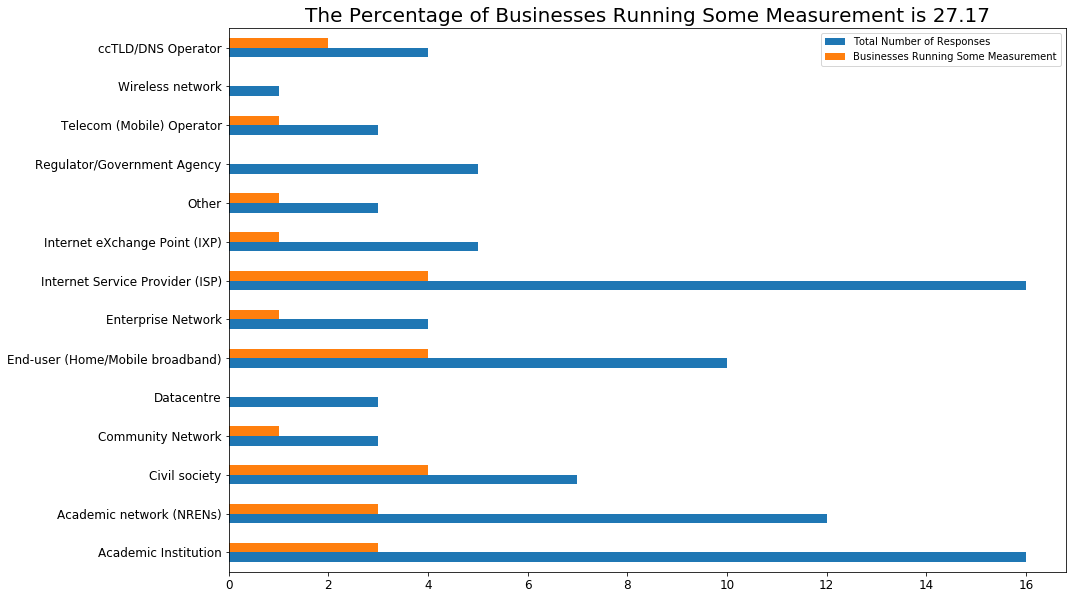

In [7]:
#Whether a business category has run measurements or not
def measurement_campaign():
    coun = business_responses()
    
    while True:
        value = input("\n\nType 'Yes' or 1 for list of businesses running measurement campaign and 'No' or 0 otherwise.\n\n")
        if value in ("yes", "Yes", "1"):
            print("\n")
            final = df[['Business Category', 'Campaign Run']][df['Campaign Run']=="Yes"]
            final2 = final.groupby('Business Category').agg({'Campaign Run': 'count'})
            text = "Running Some Measurement"
            break
        if value in ("No", "no", "0"):
            print("\n")
            final = df[['Business Category', 'Campaign Run']][df['Campaign Run']=="No (Go to Question 6)"]
            final2 = (final.groupby('Business Category').agg({'Campaign Run': 'count'})).sort_values('Campaign Run',\
                                                                                                 ascending=False)
            text = "Not Running Any Measurement"
            break
        print("Invalid response.")
    
    new = pd.concat([coun, final2], axis=1, sort=True)
    new.columns = ['Total Number of Responses', 'Businesses ' + text]
    
    percentage = round((new.T.iloc[1].sum()/new['Total Number of Responses'].sum())*100, 2)
    ax = new.plot(kind='barh', figsize=(15,10), legend=True, fontsize=12)
    
    ax.set_title("The Percentage of Businesses " + text + " is " + str(percentage), fontsize = 20)
    plt.show()
    return 
   
measurement_campaign()

In [21]:
#Further Information from businesses that run campaign(s)
def campaign_info():
    df2 = df.set_index('Business Category')
    df3 = df2[types_of_network]
    while True:
        input1 = input("To read the further info supplied by respondents about their measurement campaign, choose a value between 0 and 24 and hit Enter or leave blank to return all the responses.\n\n\n\n")
        if (input1.isdigit()):
            value = int(input1)
            if value in range(0, 24):
                #print(value)
                text = tuple(list(df2[['5._Please_provide_more_information.']].dropna().values[value]))[0]
                print(text)
                return df2.loc[df2['5._Please_provide_more_information.'] == text]
                break
            else:
                print("Enter values between 0 and 24. \n\n\n\n")
        elif input1 == "":
            return df3.loc[df3['Campaign Run']== "Yes"]#.dropna()
    
campaign_info()

To read the further info supplied by respondents about their measurement campaign, choose a value between 0 and 24 and hit Enter or leave blank to return all the responses.






,Country,Campaign Run,5._Please_provide_more_information.,3._What_type_of_network_are_you_operating?_[FTTX],3._What_type_of_network_are_you_operating?_[ADSL],"3._What_type_of_network_are_you_operating?_[Mobile_(2G,_3G,_LTE,_LTE-A)]","3._What_type_of_network_are_you_operating?_[Wireless_network_(WIFI,_Wimax)]",3._What_type_of_network_are_you_operating?_[IP_Transit_Services/Wholesale],3._What_type_of_network_are_you_operating?_[Community_network_(Mesh_network)],3._What_type_of_network_are_you_operating?_[Local_Area_Network],3._What_type_of_network_are_you_operating?_[N/A],3._What_type_of_network_are_you_operating?_[Other]
Business Category,,,,,,,,,,,,
Academic Institution,Sudan,Yes,Our own network monitory\nAltlas\nKida,No,No,No,Yes,No,Yes,Yes,No,NaN
Internet eXchange Point (IXP),Madagascar,Yes,La mésure de trafic réseau internet est un élé...,No,No,No,Yes,Yes,No,Yes,No,NaN
Enterprise Network,South Africa,Yes,Ran own RIPE probe on home network,Yes,No,No,No,Yes,No,Yes,No,WAN
Internet Service Provider (ISP),Nigeria,Yes,Regular user satisfaction measurement campaign,No,No,No,No,Yes,No,No,No,NaN
Telecom (Mobile) Operator,Burkina Faso,Yes,I'm hosting RIPE ATLAS and Anchor at Orange Bu...,No,No,Yes,Yes,Yes,No,Yes,No,NaN
Civil society,Gambia,Yes,For monitoring interference and also our projects,No,No,Yes,Yes,No,Yes,Yes,No,NaN
Internet Service Provider (ISP),Angola,Yes,atlas probes,No,No,No,No,Yes,No,No,No,NaN
Academic network (NRENs),Reunion,Yes,L'accès à Internet des îles de la Zone Océan I...,Yes,Yes,No,No,No,No,No,No,NaN
Academic Institution,Nigeria,Yes,"In a research. ""Influence of personality trait...",No,No,No,No,No,No,Yes,No,NaN


In [59]:
#Data by Country
def country():
    
    df2 = df.set_index('Country')
    return df2.loc['Nigeria']
subsets()

,Response_ID,Date_submitted,Last_page,Start_language,Date_started,Date_last_action,Business Category,2._Please_select_your_business_category?_[Other],3._What_type_of_network_are_you_operating?_[FTTX],3._What_type_of_network_are_you_operating?_[ADSL],...,Question_time:_ques22,Question_time:_ques23,Question_time:_ques24,Question_time:_ques25,Group_time:_Conclusion,Question_time:_ques26,Question_time:_ques27,Question_time:_ques28,Question_time:_ques29,Question_time:_ques30
Country,,,,,,,,,,,,,,,,,,,,,
Nigeria,47,2019-01-31 08:33:51,6,en,2019-01-31 08:21:33,2019-01-31 08:33:51,Internet Service Provider (ISP),NaN,No,No,...,NaN,NaN,NaN,NaN,136.47,NaN,NaN,NaN,NaN,NaN
Nigeria,68,2019-01-31 13:39:44,6,en,2019-01-31 13:25:06,2019-01-31 13:39:44,Regulator/Government Agency,NaN,Yes,No,...,NaN,NaN,NaN,NaN,126.38,NaN,NaN,NaN,NaN,NaN
Nigeria,71,2019-01-31 16:24:45,6,en,2019-01-31 16:15:54,2019-01-31 16:24:45,Academic Institution,NaN,No,No,...,NaN,NaN,NaN,NaN,123.94,NaN,NaN,NaN,NaN,NaN
Nigeria,74,2019-01-31 19:51:46,6,en,2019-01-31 19:44:18,2019-01-31 19:51:46,Academic Institution,NaN,No,No,...,NaN,NaN,NaN,NaN,69.19,NaN,NaN,NaN,NaN,NaN
Nigeria,76,2019-01-31 21:11:10,6,en,2019-01-31 20:44:55,2019-01-31 21:11:10,Enterprise Network,NaN,No,No,...,NaN,NaN,NaN,NaN,911.19,NaN,NaN,NaN,NaN,NaN
Nigeria,83,2019-02-01 16:35:17,6,en,2019-02-01 16:20:53,2019-02-01 16:35:17,Academic Institution,NaN,No,No,...,NaN,NaN,NaN,NaN,249.60,NaN,NaN,NaN,NaN,NaN
Nigeria,97,2019-02-04 08:25:31,6,en,2019-02-04 08:06:40,2019-02-04 08:25:31,Civil society,NaN,No,No,...,NaN,NaN,NaN,NaN,234.89,NaN,NaN,NaN,NaN,NaN
Nigeria,119,2019-02-04 12:58:23,6,en,2019-02-04 12:42:30,2019-02-04 12:58:23,Academic Institution,NaN,No,No,...,NaN,NaN,NaN,NaN,159.80,NaN,NaN,NaN,NaN,NaN
Nigeria,167,2019-02-11 22:47:22,6,en,2019-02-11 22:13:00,2019-02-11 22:47:22,Civil society,NaN,No,No,...,NaN,NaN,NaN,NaN,1061.55,NaN,NaN,NaN,NaN,NaN


In [64]:
#responses from specific countries
nigeria = df[df['1._Please_select_your_country:'] == "Nigeria"]
south_africa = df[df['1._Please_select_your_country:'] == "South Africa"]
south_africa

,Response_ID,Date_submitted,Last_page,Start_language,Date_started,Date_last_action,1._Please_select_your_country:,2._Please_select_your_business_category?,2._Please_select_your_business_category?_[Other],3._What_type_of_network_are_you_operating?_[FTTX],...,Question_time:_ques22,Question_time:_ques23,Question_time:_ques24,Question_time:_ques25,Group_time:_Conclusion,Question_time:_ques26,Question_time:_ques27,Question_time:_ques28,Question_time:_ques29,Question_time:_ques30
5,44,2019-01-31 07:40:22,6,en,2019-01-31 07:33:47,2019-01-31 07:40:22,South Africa,Enterprise Network,NaN,Yes,...,NaN,NaN,NaN,NaN,82.52,NaN,NaN,NaN,NaN,NaN
27,96,2019-02-04 08:23:14,6,en,2019-02-04 08:00:20,2019-02-04 08:23:14,South Africa,Internet Service Provider (ISP),NaN,Yes,...,NaN,NaN,NaN,NaN,698.43,NaN,NaN,NaN,NaN,NaN
29,98,2019-02-04 08:29:30,6,en,2019-02-04 08:22:00,2019-02-04 08:29:30,South Africa,ccTLD/DNS Operator,NaN,Yes,...,NaN,NaN,NaN,NaN,113.90,NaN,NaN,NaN,NaN,NaN
30,101,2019-02-04 09:05:01,6,en,2019-02-04 08:51:47,2019-02-04 09:05:01,South Africa,Community Network,NaN,No,...,NaN,NaN,NaN,NaN,194.04,NaN,NaN,NaN,NaN,NaN
32,105,2019-02-04 09:19:59,6,en,2019-02-04 09:14:22,2019-02-04 09:19:59,South Africa,Internet Service Provider (ISP),NaN,Yes,...,NaN,NaN,NaN,NaN,69.76,NaN,NaN,NaN,NaN,NaN
33,108,2019-02-04 10:31:06,6,en,2019-02-04 10:18:12,2019-02-04 10:31:06,South Africa,Internet Service Provider (ISP),NaN,Yes,...,NaN,NaN,NaN,NaN,132.03,NaN,NaN,NaN,NaN,NaN
40,124,2019-02-04 14:33:54,6,en,2019-02-04 14:27:03,2019-02-04 14:33:54,South Africa,Internet Service Provider (ISP),NaN,Yes,...,NaN,NaN,NaN,NaN,42.69,NaN,NaN,NaN,NaN,NaN
51,157,2019-02-08 07:25:33,6,en,2019-02-08 07:16:09,2019-02-08 07:25:33,South Africa,Community Network,NaN,No,...,NaN,NaN,NaN,NaN,132.37,NaN,NaN,NaN,NaN,NaN
55,164,2019-02-11 07:21:12,6,en,2019-02-11 07:16:24,2019-02-11 07:21:11,South Africa,Internet Service Provider (ISP),NaN,No,...,NaN,NaN,NaN,NaN,79.00,NaN,NaN,NaN,NaN,NaN
60,179,2019-02-18 07:29:13,6,en,2019-02-18 07:24:18,2019-02-18 07:29:13,South Africa,Internet Service Provider (ISP),NaN,Yes,...,NaN,NaN,NaN,NaN,37.07,NaN,NaN,NaN,NaN,NaN


In [51]:
#df['Perc_resp_country'] = df.groupby('1._Please_select_your_country:', as_index=\
#                                     False)['1._Please_select_your_country:']\
#                                     .transform(lambda x: x.value_counts(dropna=False, normalize=True)*100)
# df.groupby('A').size() * 100 / len(df)

df['1._Please_select_your_country:'].value_counts(dropna=False, normalize=True)*100
col

1                 12.903226
South Africa      12.903226
Nigeria           11.290323
3                  4.838710
Ethiopia           4.838710
Uganda             4.838710
Morocco            3.225806
Sudan              3.225806
2                  3.225806
Madagascar         2.419355
Ghana              2.419355
Kenya              2.419355
Mauritius          2.419355
Burkina Faso       2.419355
Cameroon           2.419355
Senegal            1.612903
Mali               1.612903
NaN                1.612903
4                  1.612903
6                  1.612903
Zimbabwe           1.612903
Benin              0.806452
Chad               0.806452
Zambia             0.806452
Malawi             0.806452
Rwanda             0.806452
Gambia             0.806452
Angola             0.806452
Mozambique         0.806452
Egypt              0.806452
Gabon              0.806452
Congo-Kinshasa     0.806452
Algeria            0.806452
Botswana           0.806452
Togo               0.806452
16                 0

In [5]:
df['1._Please_select_your_country:'].unique()

array(['Mauritius', 'Congo-Kinshasa', 'Sudan', 'Zimbabwe', 'Madagascar',
       'South Africa', 'Nigeria', 'Burkina Faso', 'Togo', "Cote d'Ivoire",
       'Cameroon', 'Gambia', 'Mali', 'Kenya', 'Angola', 'Reunion',
       'Morocco', 'Botswana', 'Malawi', 'Ghana', 'Gabon', 'Ethiopia',
       'Uganda', 'Algeria', 'Benin', nan, 'Chad', 'Egypt', 'Senegal',
       'Zambia', 'Mozambique', 'Rwanda'], dtype=object)